In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

data_dir = '/kaggle/input/sisdata/laiba-20230810T045334Z-001/laiba'

input_shape = (224, 224)
batch_size = 24

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

def build_model(learning_rate):
    base_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    #x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Hyperparameters to tune
learning_rates = [5e-3, 8e-3, 1e-3, 3e-3]

best_loss = 1000
best_accuracy = 0.0
best_model = None
best_lr = 0

# Iteration over different learning rates
for lr in learning_rates:
    model = build_model(learning_rate=lr)
    print("----------- For -------------")
    print("-----------", lr,"-------------")
    epochs = 20
    model.fit(train_generator, epochs=epochs, validation_data=valid_generator, verbose=1)

    loss, accuracy = model.evaluate(valid_generator)

    if loss < best_loss:
        best_lr = lr
        best_loss = loss
        best_accuracy = accuracy
        best_model = model

print("Best Validation Accuracy:", best_accuracy)
print("Best Validation Loss:", best_loss)

# Evaluate the best model
validation_loss, validation_acc = best_model.evaluate(valid_generator)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_acc)
print("Learning Rate:", best_lr)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 176 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
94765736/94765736 [==============================] - 3s 0us/step
----------- For -------------
----------- 0.005 -------------
Epoch 1/20
8/8 [==============================] - 19s 1s/step - loss: 6.4182 - accuracy: 0.5852 - val_loss: 0.5964 - val_accuracy: 0.7381
Epoch 2/20
8/8 [==============================] - 8s 1s/step - loss: 4.0997 - accuracy: 0.4489 - val_loss: 1.2966 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 7s 834ms/step - loss: 2.4181 - accuracy: 0.5795 - val_loss: 0.2845 - val_accuracy: 0.8571
Epoch 4/20
8/8 [==============================] - 6s 857ms/step - loss: 1.6878 - accuracy: 0.5966 - val_loss: 0.2624 - val_accuracy: 0.9286
Epoch 5/20
8/8 [==============================] - 6s 822ms/step - loss: 1.7102 - accuracy: 0.5852 - val_loss: 0.2481 - val_accuracy: 0.9524
Epoch 6/20
8/8 [==============================] - 6s 777ms/step - loss: 0.6592 - accuracy: 0.7102

In [2]:
model = build_model(best_lr)
model.fit(train_generator, epochs=100, validation_data=valid_generator, verbose=1)

Epoch 1/100
8/8 [==============================] - 11s 877ms/step - loss: 10.2406 - accuracy: 0.4602 - val_loss: 0.7538 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 6s 738ms/step - loss: 0.9199 - accuracy: 0.5284 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 6s 747ms/step - loss: 0.9592 - accuracy: 0.5000 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 4/100
8/8 [==============================] - 6s 855ms/step - loss: 0.8778 - accuracy: 0.4886 - val_loss: 0.7239 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 6s 757ms/step - loss: 0.7674 - accuracy: 0.4886 - val_loss: 0.7201 - val_accuracy: 0.5000
Epoch 6/100
8/8 [==============================] - 6s 784ms/step - loss: 0.7030 - accuracy: 0.5568 - val_loss: 0.7425 - val_accuracy: 0.5000
Epoch 7/100
8/8 [==============================] - 6s 718ms/step - loss: 0.7877 - accuracy: 0.4489 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 8/100

Found 28 images belonging to 2 classes.
28/28 [==============================] - 2s 20ms/step
Classification Report:
              precision    recall  f1-score   support

        real       1.00      0.83      0.91        12
         sis       0.89      1.00      0.94        16

    accuracy                           0.93        28
   macro avg       0.94      0.92      0.93        28
weighted avg       0.94      0.93      0.93        28



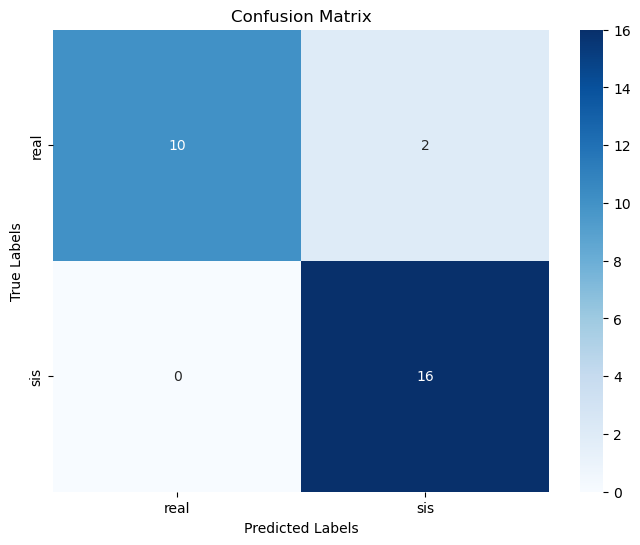

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# # Load your trained model
# model = best_model

# Path to your testing data folder
test_data_dir = '/kaggle/input/sisdata/laiba_test'

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape,
    batch_size=1,  # Set batch size to 1 for one-by-one prediction
    class_mode='binary',
    shuffle=False  # Important: set shuffle to False for generating correct labels
)

# Make predictions on test data
predictions = model.predict(test_generator)

# Convert probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions).flatten()

# Get true labels from the generator
true_labels = test_generator.classes

# Generate a classification report
class_labels = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)

print("Classification Report:")
print(classification_rep)

# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [4]:
model.save('/kaggle/working/resNet50.h5')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load your trained model
model = load_model('/kaggle/input/resnet50/resNet50.h5')  # Replace with the actual path

# Path to your testing data folder
test_data_dir = '/kaggle/input/sisdata/laiba_test'

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=1,  # Set batch size to 1 for one-by-one prediction
    class_mode='binary',
    shuffle=False  # Important: set shuffle to False for generating correct labels
)

# Make predictions on test data
predictions = model.predict(test_generator)

# Convert probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions).flatten()

# Get filenames from the generator
filenames = test_generator.filenames

# Get true labels from the generator
true_labels = test_generator.classes

# Iterate through images, filenames, true labels, and predicted labels
for filename, true_label, predicted_label in zip(filenames, true_labels, predicted_labels):
    img_path = os.path.join(test_data_dir, filename)
    img = plt.imread(img_path)

    predicted_class = "Screen" if predicted_label == 1 else "Real"
    true_class = "Screen" if true_label == 1 else "Real"

    plt.imshow(img)
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()